<a href="https://colab.research.google.com/github/mrandrivan/ML-DL-AI-practice/blob/main/Clinical_Trials_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First let's import the libraries and install dependencies

!pip install lifelines # this installs the package needed for the KaplanMeier package

import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=f88bb94e2c4e9171d4564fd7d9f809aa96560a874c1671e9ff937090f43d44db
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [16]:
#2.1 Loading in the dataset

import pandas as pd

# Adjust this path to where your dataset is actually located
file_path = r'heart_failure_clinical_records_dataset.csv'

# Load the dataset
trials_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm
trials_data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


STEP 2: Fitting the Model to the data itself

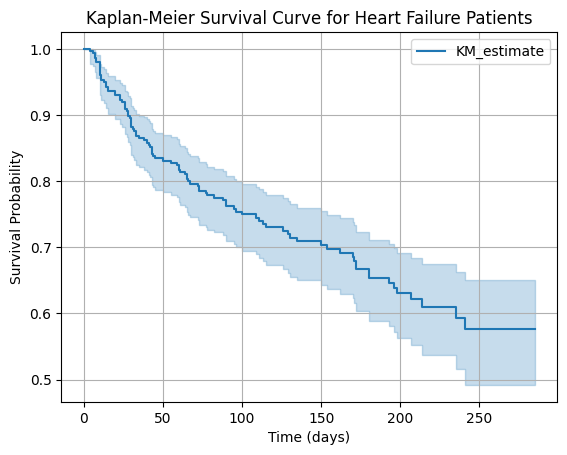

In [17]:
#Step 2.1 Fitting the Kaplan Meier model

#Create the Kaplan-Meier fitter instance
kmf = KaplanMeierFitter()

# Defining the time and event columns
T = trials_data['time']  # extracts the time data (how long each patient was followed up).
E = trials_data['DEATH_EVENT']  # column indicates whether the patient died during the study (1) or not (0).

# Fit the model
kmf.fit(T, event_observed=E) #Fits the Kaplan-Meier estimator to your data.

# Plot the survival function
kmf.plot_survival_function() #This plots the survival curve, which shows the probability of surviving over time.
plt.title('Kaplan-Meier Survival Curve for Heart Failure Patients')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


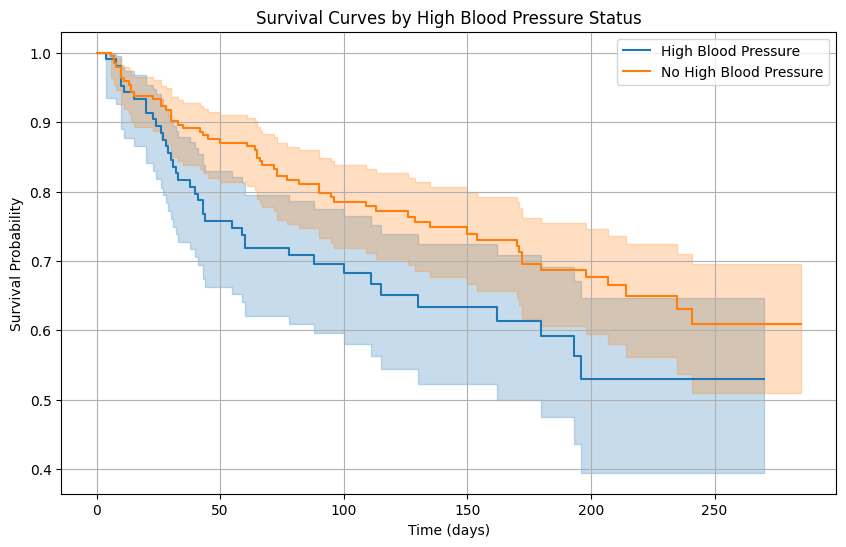

In [18]:
#Step 2.2 Further analyses

#Variable creation
# Separate the patients into groups with high and low blood pressure
high_bp = trials_data[trials_data['high_blood_pressure'] == 1]
no_high_bp = trials_data[trials_data['high_blood_pressure'] == 0]


# Create Kaplan-Meier fitter instances for each group
kmf_high_bp = KaplanMeierFitter()
kmf_no_high_bp = KaplanMeierFitter()

#Model Fitting
# Fit the model for high blood pressure group
kmf_high_bp.fit(high_bp['time'], event_observed=high_bp['DEATH_EVENT'], label="High Blood Pressure")

# Fit the model for no high blood pressure group
kmf_no_high_bp.fit(no_high_bp['time'], event_observed=no_high_bp['DEATH_EVENT'], label="No High Blood Pressure")


#Plotting
# Plot both survival curves
plt.figure(figsize=(10, 6))
kmf_high_bp.plot_survival_function()
kmf_no_high_bp.plot_survival_function()

# Add title and labels
plt.title('Survival Curves by High Blood Pressure Status')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()





**Step 3: Statistical Comparison with Log-Rank Test**

The log-rank test is a statistical test used to compare the survival distributions of two or more groups. It checks whether there's a statistically significant difference between the survival rates of the groups.

In [19]:
# Statistical Comparison of Survival of Groups
from lifelines.statistics import logrank_test

# Run the log-rank test for high blood pressure vs no high blood pressure
results = logrank_test(high_bp['time'], no_high_bp['time'],
                       event_observed_A=high_bp['DEATH_EVENT'],
                       event_observed_B=no_high_bp['DEATH_EVENT'])

# Print the p-value
print(f"P-value for comparison between groups: {results.p_value}")


P-value for comparison between groups: 0.03580752428692375


Based on Kaplan-Meier survival analysis, we found that patients with high blood pressure have significantly worse survival outcomes compared to those without high blood pressure. The log-rank test confirms this finding, with a p-value of 0.035, indicating a statistically significant difference. This suggests that high blood pressure is a critical factor in the survival of heart failure patients and warrants more aggressive management in clinical settings."